In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [29]:
# distance of each center from origin
dist_from_origin = 3

# variance of gaussians (assuming spherical covariance)
var = 1

# number of samples
n = 10000

# epsilon
eps = 0.5

In [3]:
def center_locations(dist_from_origin):
    x_1 = -dist_from_origin / 2 * np.sqrt(3)
    y_1 = dist_from_origin / 2
    
    x_2 = -x_1
    y_2 = y_1
    
    x_3 = 0
    y_3 = -dist_from_origin
    
    return (x_1, y_1), (x_2, y_2), (x_3, y_3)

In [4]:
centers = center_locations(dist_from_origin)

In [5]:
def dist(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [6]:
print(dist(centers[0], (0, 0)), dist(centers[0], (0, 0)), dist(centers[1], (0, 0)))

3.0 3.0 3.0


In [7]:
print(dist(centers[0], centers[1]), dist(centers[0], centers[2]), dist(centers[1], centers[2]))

5.196152422706632 5.196152422706632 5.196152422706632


In [30]:
def get_samples(centers, var, n):
    samples_per_class = []
    for c_x, c_y in centers:
        samples = np.sqrt(var) * np.random.randn(n, 2)
        samples[:, 0] = samples[:, 0] + c_x
        samples[:, 1] = samples[:, 1] + c_y
        samples_per_class.append(samples)
    return samples_per_class

In [31]:
sample_1, sample_2, sample_3 = get_samples(centers, var, n)

In [10]:
plt.rcParams['figure.figsize'] = [5, 5]

(-4.5, 4.5)

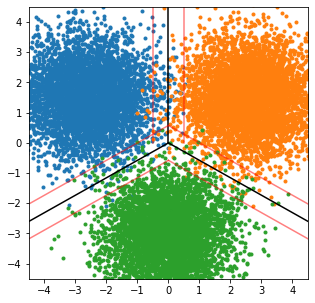

In [11]:
plt.plot(sample_1[:, 0], sample_1[:, 1], '.')
plt.plot(sample_2[:, 0], sample_2[:, 1], '.')
plt.plot(sample_3[:, 0], sample_3[:, 1], '.')
plt.axvline(x=0, ymin=0.5, color='k')
plt.axvline(x=-eps, ymin=0.5, color='r', alpha=0.5)
plt.axvline(x=eps, ymin=0.5, color='r', alpha=0.5)
plt.plot(np.arange(-4.5, 0.5, 0.5), 1/np.sqrt(3) * np.arange(-4.5, 0.5, 0.5), 'k')
plt.plot(np.arange(-4.5, 0.5, 0.5), 1/np.sqrt(3) * np.arange(-4.5, 0.5, 0.5) + eps * np.sqrt(4/3), 'r', alpha=0.5)
plt.plot(np.arange(-4.5, 0.5, 0.5), 1/np.sqrt(3) * np.arange(-4.5, 0.5, 0.5) - eps * np.sqrt(4/3), 'r', alpha=0.5)
plt.plot(np.arange(0, 5, 0.5), -1/np.sqrt(3) * np.arange(0, 5, 0.5), 'k')
plt.plot(np.arange(0, 5, 0.5), -1/np.sqrt(3) * np.arange(0, 5, 0.5) + eps * np.sqrt(4/3), 'r', alpha=0.5)
plt.plot(np.arange(0, 5, 0.5), -1/np.sqrt(3) * np.arange(0, 5, 0.5) - eps * np.sqrt(4/3), 'r', alpha=0.5)

plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)

In [12]:
def q_func(x):
    return 0.5 - 0.5*special.erf(x/np.sqrt(2)) 

def z_score(x, mu, sigma):
    return (x - mu) / sigma

In [13]:
centers

((-2.598076211353316, 1.5), (2.598076211353316, 1.5), (0, -3))

In [14]:
def error_via_classifier(centers, var, eps):    
    # computing error for the upper left Gaussian
    # p(x > -eps)
    px_0 = q_func(z_score(-eps, centers[0][0], np.sqrt(var)))
    # p(y < 1/sqrt(3)x + sqrt(4/3)*eps)
    error_1 =  px_0 + 0.0150352 #(1 - px_0) * py_0
    print(error_1)
    
    # computing error for the upper right Gaussian
    # p(x > eps)
    px_1 = q_func(z_score(eps, centers[1][0], np.sqrt(var)))
    # p(y < -1/sqrt(3)x + sqrt(4/3)*eps)
    error_2 = (1 - px_1) + 0.0150352 #px_1 * py_1
    print(error_2)
    
    # computing error for bottom Gaussian
    error_3 = 0.0164922 + 0.0164922#px_2 * py_2_1 + (1-px_2) * py_2_0
    print(error_3)
    return error_1, error_2, error_3

In [15]:
err1, err2, err3 = error_via_classifier(centers, var, eps) # ???

0.032984406804189376
0.03298440680418932
0.0329844


In [16]:
# use lower bounds code to compute error
from sklearn.metrics import pairwise_distances

In [47]:
def get_edge_pairs(samples, eps):
    edge_pairs = []
    with_edges = set()
    dists = {}
    
    for i in range(len(samples)):
        for j in range(i+1, len(samples)):
            D_ij = pairwise_distances(samples[i],samples[j],metric='euclidean')
            print(D_ij.shape)
            edge_matrix = D_ij <= 2 * eps
            edges = np.where(edge_matrix==True)
            n_edges = len(edges[0])
            print(n_edges)
            for e in range(n_edges):
                j1=edges[0][e] + len(samples[0]) * i
                j2=edges[1][e]+ len(samples[0]) * j
                edge_pairs.append((j1, j2))
                dists[(j1, j2)] = D_ij[edges[0][e], edges[1][e]]
                with_edges.add(j1)
                with_edges.add(j2)
    return edge_pairs, with_edges, dists

In [48]:
edges, with_edges, dists = get_edge_pairs([sample_1, sample_2, sample_3], eps)

(10000, 10000)
61383
(10000, 10000)
52818
(10000, 10000)
52491


In [46]:
num_edges = len(edges)
print('num edges:', num_edges)

num edges: 166692


In [35]:
from optimal_log_loss_lp_hyper import find_hyper, construct_constraints, construct_incidence, run_solver

In [36]:
hyper, _, del_edges, _, num_triangles, num_hyper, _, _, _, _ = find_hyper(edges, False, 3, 3, [n, n, n], eps, 'l2',
                dists=dists, plot_edges=False)

In [37]:
print('num triangles', num_triangles)
print('num hyper:', num_hyper)

num triangles 222396
num hyper: 202737


In [57]:
num_edges_updated = num_edges - len(del_edges)
incidence_row_coord, incidence_col_coord = construct_incidence(num_edges_updated, num_hyper, hyper, 0, [], edges, del_edges, {})
incidence_row_coord, incidence_col_coord = construct_constraints(n*3, num_edges_updated + num_hyper, incidence_row_coord, incidence_col_coord,
                                                                            True, with_edges)

In [58]:
output = run_solver(incidence_row_coord, incidence_col_coord, '0-1', n*3, num_edges_updated + num_hyper, False, False)

Constraint matrix size = 335639 x 30000
     pcost       dcost       gap    pres   dres   k/t
 0: -3.8571e-01 -3.3565e+05  5e+05  1e+00  5e+04  1e+00
 1: -4.3505e-01 -4.4403e+04  3e+04  2e-01  6e+03  2e+00
 2: -4.3846e-01 -5.6750e+02  3e+02  2e-03  8e+01  2e-01
 3: -4.4949e-01 -1.6116e+01  8e+00  7e-05  2e+00  4e-03
 4: -5.2289e-01 -1.4096e+01  7e+00  6e-05  2e+00  4e-03
 5: -6.0593e-01 -1.1897e+01  6e+00  5e-05  2e+00  3e-03
 6: -7.0039e-01 -8.1243e+00  4e+00  3e-05  1e+00  1e-03
 7: -7.8075e-01 -4.9743e+00  2e+00  2e-05  6e-01  6e-04
 8: -8.2498e-01 -3.5978e+00  1e+00  1e-05  4e-01  3e-04
 9: -8.5058e-01 -2.9208e+00  1e+00  9e-06  3e-01  2e-04
10: -8.6931e-01 -2.4069e+00  8e-01  7e-06  2e-01  5e-05
11: -8.7915e-01 -2.1829e+00  7e-01  6e-06  2e-01  2e-05
12: -8.9460e-01 -1.8545e+00  5e-01  4e-06  1e-01  3e-06
13: -9.1158e-01 -1.5865e+00  3e-01  3e-06  9e-02  1e-06
14: -9.1981e-01 -1.4491e+00  3e-01  2e-06  7e-02  8e-07
15: -9.3413e-01 -1.2733e+00  2e-01  1e-06  5e-02  5e-07
16: -9.398

KeyboardInterrupt: 

In [59]:
print("optimal 0-1 loss:", (1-np.array(output['x'])).sum()/ (n*3))

optimal 0-1 loss: 0.030933418201997853


In [41]:
num_edges_updated = num_edges
incidence_row_coord, incidence_col_coord = construct_incidence(num_edges_updated, 0, [], 0, [], edges, {}, {})
incidence_row_coord, incidence_col_coord = construct_constraints(n*3, num_edges_updated, incidence_row_coord, incidence_col_coord,
                                                                            True, with_edges)

In [42]:
output = run_solver(incidence_row_coord, incidence_col_coord, '0-1', n*3, num_edges_updated + num_hyper, False, False)

Constraint matrix size = 399429 x 30000
     pcost       dcost       gap    pres   dres   k/t
 0: -3.7938e-01 -3.9944e+05  9e+05  2e+00  1e+04  1e+00
 1: -4.7024e-01 -4.4712e+04  5e+04  2e-01  1e+03  2e+00
 2: -4.7250e-01 -4.1810e+04  4e+04  2e-01  1e+03  2e+00
 3: -4.6434e-01 -3.9440e+04  4e+04  2e-01  1e+03  1e+00
 4: -4.4251e-01 -2.9338e+04  3e+04  1e-01  8e+02  5e-01
 5: -4.3131e-01 -8.9030e+03  8e+03  4e-02  2e+02  5e-02
 6: -4.2694e-01 -9.6837e+01  9e+01  4e-04  3e+00  6e-04
 7: -4.6130e-01 -5.7872e+00  5e+00  2e-05  1e-01  3e-05
 8: -7.5637e-01 -2.6516e+00  2e+00  8e-06  5e-02  1e-05
 9: -8.7133e-01 -1.5124e+00  5e-01  3e-06  2e-02  3e-06
10: -9.1380e-01 -1.2636e+00  3e-01  1e-06  9e-03  1e-06
11: -9.3453e-01 -1.1553e+00  2e-01  9e-07  6e-03  7e-07
12: -9.4554e-01 -1.0932e+00  1e-01  6e-07  4e-03  4e-07
13: -9.5310e-01 -1.0486e+00  7e-02  4e-07  3e-03  2e-07
14: -9.5905e-01 -1.0164e+00  4e-02  2e-07  2e-03  1e-07
15: -9.6374e-01 -9.9263e-01  2e-02  1e-07  8e-04  6e-08
16: -9.666

In [56]:
print("optimal 0-1 loss:", (1-np.array(output['x']).sum()/ (n*3)))

optimal 0-1 loss: 0.030933418201997798


(array([9.0100e+02, 0.0000e+00, 2.0000e+00, 4.0000e+00, 2.1000e+01,
        2.1000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00, 2.9045e+04]),
 array([1.20414530e-11, 9.99999981e-02, 1.99999996e-01, 2.99999994e-01,
        3.99999992e-01, 4.99999990e-01, 5.99999988e-01, 6.99999986e-01,
        7.99999985e-01, 8.99999983e-01, 9.99999981e-01]),
 <BarContainer object of 10 artists>)

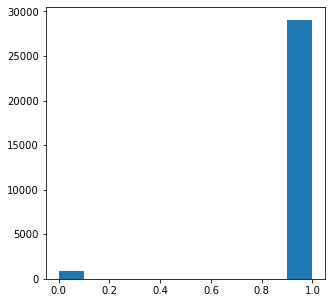

In [50]:
plt.hist(np.array(output['x']))

In [52]:
np.array(output['z'])

array([[6.51372254e-13],
       [6.85005366e-13],
       [5.56230772e-08],
       ...,
       [6.50757061e-13],
       [6.50757061e-13],
       [6.50757061e-13]])